### REGRESSÃO ###
PARÂMETROS: 
	 Total de realizações:  1 

### REALIZAÇÃO  1 ##########
MSE:  0.36835390450289845
##########################
MSE médio:  0.36835390450289845


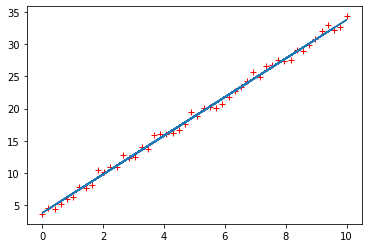

### FIM REGRESSÃO ###


In [3]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt

# Generate function ax + b
def generateData2D(a, b):
    x = np.linspace(0,10,50)
    y = a * x + b
    data = []
    for i in range(len(y)):
        y[i] += np.random.uniform(-1.0, 1.0)

    for i, j in zip(x, y):
        data.append([i, j])
    
    data = np.asarray(data)
#    data = normalize(data)
    data = insertbias(data)

    return np.asarray(data)

# Insert Bias
def insertbias(data):
    new = []
    for i in range(len(data)):
        new.append(np.insert(data[i], 0, -1))
    return np.asarray(new)

# Normalize
def normalize(data):
    c = data.shape[1] - 1
    for i in range(data.shape[1]):
        if(i < c):
            max_ = max(data[:, i])
            min_ = min(data[:, i])
            for j in range(data.shape[0]):
                data[j, i] = (data[j, i] - min_) / (max_ - min_)
    return data

# Divide into train and test
def divide(data):
    return data[0: int(len(data) * 0.8)], data[int(len(data) * 0.8):]

# Divide into x and y 
def split_samples(dataset, n_attributes):
    return np.array(dataset[:, 0:n_attributes-1]), np.array(dataset[:, -1])

# Training
def training(training_set):
    x_train, y_train = split_samples(training_set, len(training_set[0]))
    pseudo_inverse = np.dot(lin.inv(np.dot(x_train.T, x_train)), x_train.T)
    weights = np.dot(pseudo_inverse,y_train)
    return weights

# Test
def test(test_set, weights):
    x_test, y_test = split_samples(test_set, len(test_set[0]))
    number_examples = x_test.shape[0]
    output = np.dot(x_test, weights)
    error = sum((y_test-output)**2)*(1./(number_examples*1.0))
    
    return error

# Evaluate an algorithm using hold-out
def execute(dataset, realizations):
    print("### REGRESSÃO ###")
    print("PARÂMETROS: ")
    print("\t Total de realizações: ", realizations, "\n")
    data = dataset
    error = []
    allweights = []
    test_errors = []
    
    for i in range(realizations):
        print("### REALIZAÇÃO ", (i+1), "##########")
        np.random.shuffle(data)  # shuffle entre realizações
        
        training_set, test_set = divide(data)
        
        weights = training(training_set)
        allweights.append(weights)
        
        errors_test = test(test_set, weights)
        test_errors.append(errors_test)

        mse = np.mean(test_errors)
        error.append(mse)
        
        print("MSE: ", mse)
        print("##########################")

    x, y = split_samples(data, len(data[0]))
    print("MSE médio: ", (sum(error) / realizations))
    plt.plot(x[:, 1], y, 'r+')
    plt.plot(x[:, 1], np.dot(x, weights))
    plt.show()
    print("### FIM REGRESSÃO ###")
    
A = 3
B = 4
REALIZATIONS = 1

dataset = generateData2D(A, B)
execute(dataset, REALIZATIONS)